In [2]:
import tensorflow as tf
from tensorflow.keras import layers, models
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
%%capture
!unzip /content/drive/MyDrive/Colab_Notebooks/archive.zip -d Chess

In [5]:
main_folder = "/content/Chess/Chessman-image-dataset/Chess"

In [6]:
image_size = (128, 128)
batch_size = 32

In [7]:
datagen = ImageDataGenerator(rescale=1./255)

In [18]:
data_generator = datagen.flow_from_directory(main_folder,target_size=image_size,batch_size=batch_size,class_mode='input',shuffle=True)

Found 551 images belonging to 6 classes.


In [11]:
X_train, y_train = data_generator.next()

In [12]:
X_train = X_train.astype('float32') / 255.0

In [13]:
print("Shape of X_train:", X_train.shape)

Shape of X_train: (32, 128, 128, 3)


In [14]:
def build_autoencoder(input_shape):
    # Encoder
    encoder_input = layers.Input(shape=input_shape)
    x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(encoder_input)
    x = layers.MaxPooling2D((2, 2), padding='same')(x)
    x = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(x)
    encoded = layers.MaxPooling2D((2, 2), padding='same')(x)
    # Decoder
    x = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(encoded)
    x = layers.UpSampling2D((2, 2))(x)
    x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(x)
    x = layers.UpSampling2D((2, 2))(x)
    decoded = layers.Conv2D(3, (3, 3), activation='sigmoid', padding='same')(x)  # 3 channels for RGB images
    # Build and compile the autoencoder model
    autoencoder = models.Model(encoder_input, decoded)
    autoencoder.compile(optimizer='adam', loss='mse')  # Mean Squared Error loss for image reconstruction
    return autoencoder

In [21]:
autoencoder = build_autoencoder(input_shape=(image_size[0], image_size[1], 3))
autoencoder.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 128, 128, 3)]     0         
                                                                 
 conv2d_5 (Conv2D)           (None, 128, 128, 32)      896       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 64, 64, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_6 (Conv2D)           (None, 64, 64, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 32, 32, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_7 (Conv2D)           (None, 32, 32, 64)        3692

In [22]:
epochs = 10
history = autoencoder.fit(data_generator, epochs=epochs, steps_per_epoch=len(data_generator), verbose=1)

Epoch 1/10
18/18 [==============================] - 47s 2s/step - loss: 0.0901
Epoch 2/10
18/18 [==============================] - 46s 3s/step - loss: 0.0445
Epoch 3/10
18/18 [==============================] - 45s 2s/step - loss: 0.0246
Epoch 4/10
18/18 [==============================] - 46s 2s/step - loss: 0.0169
Epoch 5/10
18/18 [==============================] - 43s 2s/step - loss: 0.0144
Epoch 6/10
18/18 [==============================] - 46s 2s/step - loss: 0.0120
Epoch 7/10
18/18 [==============================] - 43s 2s/step - loss: 0.0106
Epoch 8/10
18/18 [==============================] - 45s 2s/step - loss: 0.0092
Epoch 9/10
18/18 [==============================] - 44s 2s/step - loss: 0.0085
Epoch 10/10
18/18 [==============================] - 48s 3s/step - loss: 0.0081


In [23]:
sample_images, _ = next(data_generator)
decoded_images = autoencoder.predict(sample_images)

1/1 [==============================] - 1s 630ms/step


In [24]:
n = min(5, batch_size)
plt.figure(figsize=(10, 4))

<Figure size 1000x400 with 0 Axes>

<Figure size 1000x400 with 0 Axes>

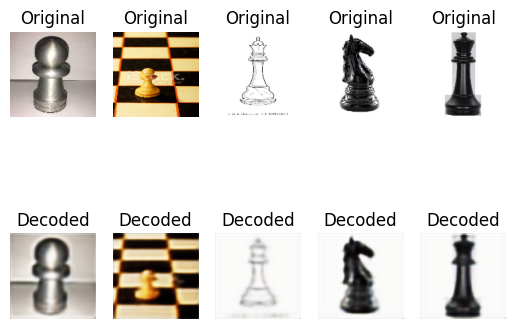

In [25]:
for i in range(n):
    # Original image
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(sample_images[i])
    plt.title('Original')
    plt.axis('off')
    # Decoded image
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_images[i])
    plt.title('Decoded')
    plt.axis('off')

plt.show()